In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import seaborn as sb
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data = pd.read_csv("C:/Users/LoadinG/Downloads/Compressed/Summary of Weather.csv")

In [3]:
data.head()

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


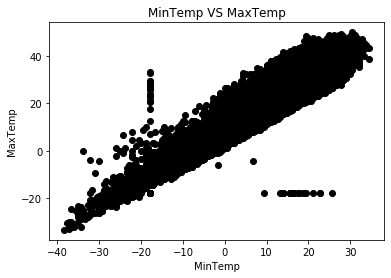

In [45]:
plt.scatter(data["MinTemp"],data["MaxTemp"],color="black")
plt.title("MinTemp VS MaxTemp")
plt.xlabel("MinTemp")
plt.ylabel("MaxTemp")
plt.show()

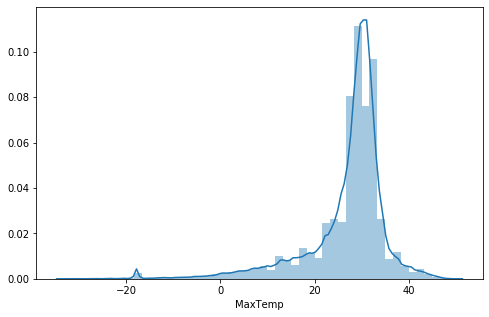

In [18]:
plt.figure(figsize=(8,5))
plt.tight_layout()
sb.distplot(data["MaxTemp"])

In [4]:
X = data["MinTemp"].values.reshape(-1,1)
Y = data["MaxTemp"].values.reshape(-1,1)

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.5, random_state = 0)

In [6]:
reg = LinearRegression()

In [7]:
reg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [8]:
print(reg.coef_)
print(reg.intercept_)

[[0.91956948]]
[10.66055071]


In [9]:
Y_predict = reg.predict(X_test)

In [12]:
reg.predict([[15]])

array([[24.45409286]])

In [103]:
df = pd.DataFrame({"Actual":Y_test.flatten(),"Predict":Y_predict.flatten()})

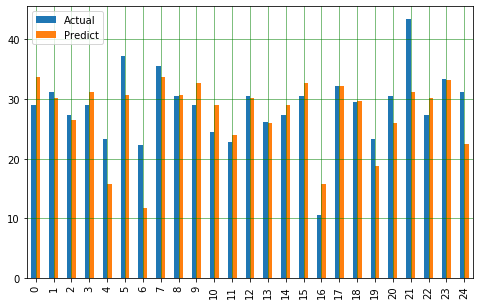

In [104]:
df1 = df.head(25)
df1.plot(kind="bar",figsize=(8,5))
plt.grid(which = "major",linestyle="-",linewidth="0.5",color="g")
plt.grid(which = "minor",linestyle=":",linewidth="0.5",color="black")
plt.show()

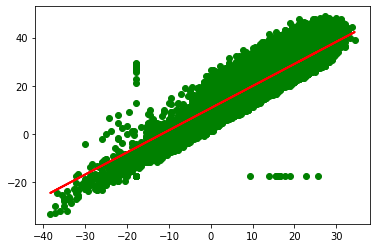

In [105]:
plt.scatter(X_test,Y_test,color = "g")
plt.plot(X_test,Y_predict,"r",linewidth=2)

In [106]:
acc = metrics.r2_score(Y_test,Y_predict)*100
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_predict))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_predict))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_predict)))
print("accuracy = "+format(acc, '.2f')+"%")

Mean Absolute Error: 3.1792689798832505
Mean Squared Error: 17.29582546489848
Root Mean Squared Error: 4.158825010131886
accuracy = 77.26%
